In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
#Veri setinin yüklenmesi
dataset = pd.read_csv('TextBlob_ML.csv' , sep=';',  engine='python', encoding='cp1254')
dataset.head()

,Unnamed: 0,Sentence,Polarity
0,0,We chase the little things in life and again h...,-1
1,1,Sejdiu has now lost both positions.,0
2,2,"But on the other hand, I realize how much I st...",0
3,3,Flights start in June.,0
4,4,We need clean people in politics.,1


In [82]:
#Veri Temizleme İşlemleri

#küçük harfe çevirme
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#noktalama işaretlerini kaldırma
dataset['Sentence'] = dataset['Sentence'].str.replace('[^\w\s]','')
#sayıları ayıklama
dataset['Sentence'] = dataset['Sentence'].str.replace('\d','')
#durak kelimeler
sw = stopwords.words('english')
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
# ender(rare) kelimeler
remove = pd.Series(" ".join(dataset["Sentence"]).split()).value_counts()[-1000:]
dataset["Sentence"]=dataset["Sentence"].apply(lambda x: " ".join(i for i in x.split() if i not in remove))

In [83]:
#Veri seti eğitim ve test verileri olmak üzere ayrılır.

X_train, X_test, y_train, y_test = train_test_split(dataset["Sentence"],dataset["Polarity"], test_size = 0.15, random_state = 42)

print(f"Eğitim Veri Sayısı : {X_train.shape[0]} Test Veri Sayısı : {X_test.shape[0]}")


Eğitim Veri Sayısı : 4250 Test Veri Sayısı : 751


In [84]:
#Vektörizasyon işlemleri için CountVectorizer kullanılmıştır.
#CountVectorizer, bir metin belgesi koleksiyonunu bir belirteç sayısı matrisine dönüştürür.
#CountVectorizer’de terim farklı dökümanlarda geçse dahi o kelimenin geçtiği miktarı matriste belirtir. 

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [85]:
#Eğitim ve test verileri üzerinde CountVectorizer ile vektörizasyon işlemi yapılmıştır.

x_train_count = vectorizer.transform(X_train)
x_test_count = vectorizer.transform(X_test)

In [86]:
#Vektörizasyon işlemleri için kullanılan bir diğer dönüştürücü ise TF-IDF(Terim Frekansı x Ters Belge Frekansı)'dir.
#TF-IDF'nin amacı, bir belgede sık görülen ancak belgeler arasında olmayan sözcükleri vurgulamaktır.
#TF-IDF,bir kelimenin bulunduğu doküman içindeki değerini gösteren istatistiki yöntemle hesaplanan ağırlık faktörüdür.

tf_idf = TfidfVectorizer()
tf_idf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [87]:
#Eğitim ve test verileri üzerinde TF-IDF ile vektörizasyon işlemi yapılmıştır.

x_train_tf_idf = tf_idf.transform(X_train)
x_test_tf_idf = tf_idf.transform(X_test)

# **Makine Öğrenmesi Modelleri**

**1 - Naive Bayes**

In [88]:
nb = MultinomialNB()  #NaiveBayes
nb_model = nb.fit(x_train_count,y_train)

y_pred = nb_model.predict(x_test_count) #counvectorizer

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.36      0.08      0.14        60
           0       0.83      0.94      0.88       554
           1       0.72      0.55      0.63       137

    accuracy                           0.80       751
   macro avg       0.64      0.53      0.55       751
weighted avg       0.77      0.80      0.77       751



In [89]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - countvectorizer
import itertools

y_pred = nb.predict(x_test_count)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

In [90]:
#Karmaşıklık matrisi fonksiyonu
def plot_confusion_matrix(cm, classes,             
                          normalize=False,
                         title="Karmaşıklık Matrisi",
                         cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/ cm.sum(axis=1)[:,np.newaxis]
        print("Normalleştirilmiş Karmaşıklık Matrisi")
    else:
        print("Normalleştirme Olmadan Karmaşıklık Matrisi")
    
    print(cm)
    
    thresh=cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("Gerçek Değerler")
    plt.xlabel("Tahmin Edilen Değerler")

Normalleştirme Olmadan Karmaşıklık Matrisi
[[  5  51   4]
 [  7 522  25]
 [  2  59  76]]


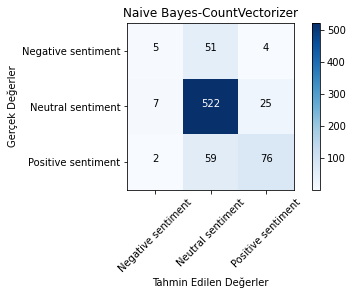

In [91]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='Naive Bayes-CountVectorizer')

In [92]:
nb_model = nb.fit(x_train_tf_idf,y_train) #Naive Bayes - tf-idf

y_pred = nb_model.predict(x_test_tf_idf)

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        60
           0       0.77      0.99      0.87       554
           1       0.89      0.24      0.38       137

    accuracy                           0.78       751
   macro avg       0.55      0.41      0.42       751
weighted avg       0.73      0.78      0.71       751



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - tf-idf
import itertools

y_pred = nb.predict(x_test_tf_idf)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[  0  60   0]
 [  0 550   4]
 [  0 104  33]]


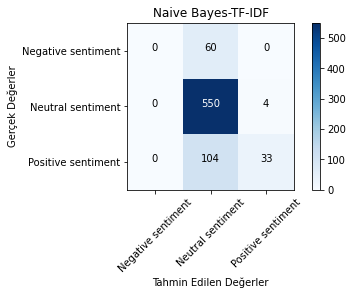

In [94]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='Naive Bayes-TF-IDF')

**2 - Random Forest**

In [95]:
rf = RandomForestClassifier() #RandomForest-countvectorizer
rf_model = rf.fit(x_train_count,y_train)

y_pred = rf_model.predict(x_test_count)

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.37      0.47        60
           0       0.88      0.95      0.91       554
           1       0.81      0.69      0.74       137

    accuracy                           0.86       751
   macro avg       0.78      0.67      0.71       751
weighted avg       0.85      0.86      0.85       751



In [96]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - countvectorizer
import itertools

y_pred = rf.predict(x_test_count)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[ 22  35   3]
 [  7 528  19]
 [  4  39  94]]


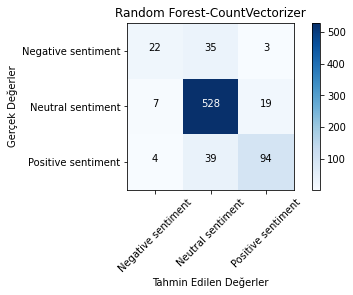

In [97]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='Random Forest-CountVectorizer')

In [98]:
rf_model = rf.fit(x_train_tf_idf,y_train) #tf-idf

y_pred = rf_model.predict(x_test_tf_idf)

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.30      0.41        60
           0       0.87      0.96      0.91       554
           1       0.83      0.69      0.75       137

    accuracy                           0.86       751
   macro avg       0.79      0.65      0.69       751
weighted avg       0.85      0.86      0.84       751



In [99]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - tf-idf
import itertools

y_pred = rf.predict(x_test_tf_idf)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[ 18  40   2]
 [  6 531  17]
 [  3  40  94]]


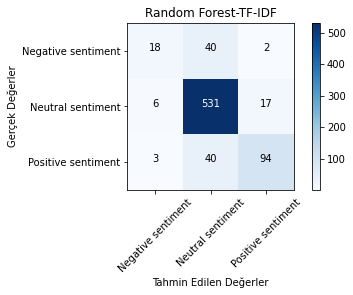

In [100]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='Random Forest-TF-IDF')

**3 - Support Vector Machine**

In [101]:
svm = LinearSVC() #Support Vector Machine
svm_model = svm.fit(x_train_count,y_train)

y_pred = svm_model.predict(x_test_count) #countvectorizer

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.33      0.43        60
           0       0.87      0.93      0.90       554
           1       0.74      0.65      0.69       137

    accuracy                           0.83       751
   macro avg       0.73      0.64      0.67       751
weighted avg       0.82      0.83      0.82       751



In [102]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - countvectorizer
import itertools

y_pred = svm.predict(x_test_count)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[ 20  35   5]
 [ 11 517  26]
 [  3  45  89]]


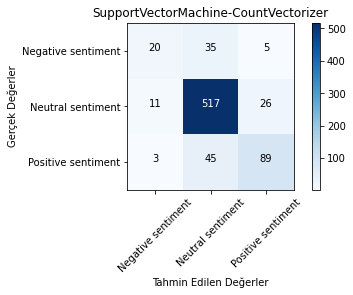

In [103]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='SupportVectorMachine-CountVectorizer')

In [104]:
svm_model = svm.fit(x_train_tf_idf,y_train) #tf-idf

y_pred = svm_model.predict(x_test_tf_idf)

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.64      0.23      0.34        60
           0       0.86      0.95      0.90       554
           1       0.77      0.66      0.71       137

    accuracy                           0.84       751
   macro avg       0.76      0.61      0.65       751
weighted avg       0.83      0.84      0.82       751



In [105]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - tf-idf
import itertools

y_pred = svm.predict(x_test_tf_idf)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[ 14  42   4]
 [  5 526  23]
 [  3  44  90]]


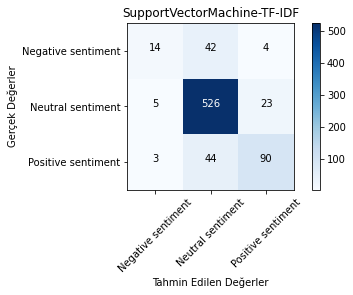

In [106]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='SupportVectorMachine-TF-IDF')

**4 - Decision Tree**

In [107]:
dt = DecisionTreeClassifier() #Decision Tree
dt_model = dt.fit(x_train_count,y_train)

y_pred = dt_model.predict(x_test_count) #countvectorizer

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.55      0.47      0.50        60
           0       0.89      0.92      0.91       554
           1       0.79      0.72      0.75       137

    accuracy                           0.85       751
   macro avg       0.74      0.70      0.72       751
weighted avg       0.85      0.85      0.85       751



In [108]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - countvectorizer
import itertools

y_pred = dt.predict(x_test_count)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[ 28  29   3]
 [ 18 512  24]
 [  5  33  99]]


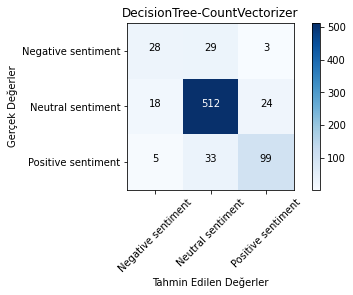

In [109]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='DecisionTree-CountVectorizer')

In [110]:
dt_model = dt.fit(x_train_tf_idf,y_train) #tf-idf

y_pred = dt_model.predict(x_test_tf_idf)

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.54      0.50      0.52        60
           0       0.90      0.90      0.90       554
           1       0.73      0.75      0.74       137

    accuracy                           0.84       751
   macro avg       0.72      0.72      0.72       751
weighted avg       0.84      0.84      0.84       751



In [111]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - tf-idf
import itertools

y_pred = dt.predict(x_test_tf_idf)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[ 30  27   3]
 [ 22 497  35]
 [  4  30 103]]


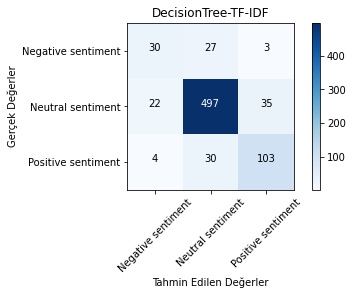

In [112]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='DecisionTree-TF-IDF')

**5 - KNN**

In [113]:
knn = KNeighborsClassifier() #knn
knn_model = knn.fit(x_train_count,y_train)

y_pred = knn_model.predict(x_test_count) #countvectorizer

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.50      0.02      0.03        60
           0       0.75      0.99      0.85       554
           1       0.76      0.09      0.17       137

    accuracy                           0.75       751
   macro avg       0.67      0.37      0.35       751
weighted avg       0.73      0.75      0.66       751



In [114]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - countvectorizer
import itertools

y_pred = knn.predict(x_test_count)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round()) 

Normalleştirme Olmadan Karmaşıklık Matrisi
[[  1  59   0]
 [  1 549   4]
 [  0 124  13]]


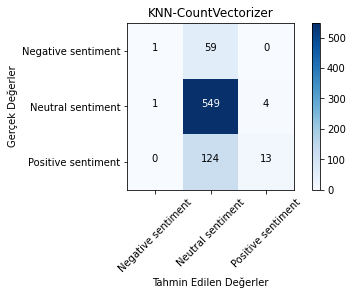

In [115]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='KNN-CountVectorizer')

In [116]:
knn_model = knn.fit(x_train_tf_idf,y_train) #tf-idf

y_pred = knn_model.predict(x_test_tf_idf)

#accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.02      0.03        60
           0       0.75      1.00      0.85       554
           1       0.89      0.06      0.11       137

    accuracy                           0.75       751
   macro avg       0.88      0.36      0.33       751
weighted avg       0.79      0.75      0.65       751



In [117]:
from sklearn.metrics import confusion_matrix #Karmaşıklık matrisi - TF-IDF
import itertools

y_pred = knn.predict(x_test_tf_idf)
y_true = y_test

cm = confusion_matrix(y_true, y_pred.round())  

Normalleştirme Olmadan Karmaşıklık Matrisi
[[  1  59   0]
 [  0 553   1]
 [  0 129   8]]


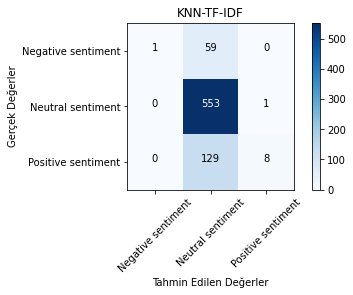

In [118]:
cm_plot_labels=['Negative sentiment','Neutral sentiment','Positive sentiment']
plot_confusion_matrix(cm,cm_plot_labels,title='KNN-TF-IDF')